## The purpose of this practise is to crawl tourist attraction which has highest star score, most comments.

In [29]:
import requests
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data collecting

In [30]:
# get url in different pages
# By checking the website url, we can see only the last number is changed in the url of different pages
def get_urls(n):
    return ['https://travel.qunar.com/p-cs299878-shanghai-jingdian-1-' + str(i+1) for i in range(n)]

In [43]:
def get_informations(u):
    # visiting website by requests function, get original code of the website
    ri = requests.get(u)
    # parse the text of code by BeautifulSoup function
    soupi = BeautifulSoup(ri.text,'lxml')
    # get the content of list from original code labelled with 'li'
    infori = soupi.find('ul',class_="list_item clrfix").find_all('li')
    
    datai = []
    n=0
    for i in infori:
        n+=1
        #print(i.text)
        # making en empty dictionary
        dic = {}
        # check the location of latitude and longitude, they are stored in 'data-lat' and 'data-lng'
        dic['lat'] = i['data-lat']
        dic['lng'] = i['data-lng']
        # get the name of attraction, it is stored in class_="en_tit" in 'span' tag (checking original code of website)
        dic['attraction_name'] = i.find('span',class_="en_tit").text
        # get the number in strategy, it is stored in class_="strategy_sum" in 'div' tag 
        dic['strategy_number'] = i.find('div',class_="strategy_sum").text
        # get the number of comments, the ranking
        dic['comment_number'] = i.find('div',class_="comment_sum").text
        dic['ranking'] = i.find('span',class_="ranking_sum").text
        # get the star information, it is stored in 'style=width:96%',we only need the number '96'
        dic['total_star'] = i.find('span',class_="total_star").find('span')['style'].split(':')[1]
        datai.append(dic)
        #print('Total collecting %s pieces information' %(n*10))
    
    return datai

In [32]:
# get 10 pages URL
url_lst = get_urls(10)
# data collection
df = pd.DataFrame()
for u in url_lst:
    dfi = pd.DataFrame(get_informations(u))
    df = pd.concat([df,dfi])
    df.reset_index(inplace = True,drop = True)

In [46]:
df.head()

,attraction_name,comment_number,lat,lng,ranking,strategy_number,total_star
0,SHDR：Shanghai Disney Resort,14238,31.146751,121.669396,上海迪士尼度假区景点排名第1,151,96%
1,The Bund,22701,31.243453,121.497204,上海景点排名第2,1067,94%
2,Shanghai City God Temple,1292,31.231574,121.499,上海景点排名第4,561,82%
3,Tianzifang,3110,31.214113,121.474974,上海景点排名第3,552,88%
4,Oriental Pearl Radio and TV Tower,25645,31.245093,121.506379,上海景点排名第1,534,90%


In [57]:
# change the data type to float or int
df['lng'] = df['lng'].astype(np.float)
df['lat'] = df['lat'].astype(np.float)
df['comment_number'] = df['comment_number'].astype(np.int)     
df['strategy_number'] = df['strategy_number'].astype(np.int)   
# remove "%" in the total_star column
df['total_star'] = df['total_star'].str.replace('%','').astype(np.float)
# remove chinese word in ranking column and fill NA with 0
df['ranking'] = df['ranking'].str.split('第').str[1]
df['ranking'].fillna(value = 0,inplace = True) 

In [68]:
df.head()

,attraction_name,comment_number,lat,lng,ranking,strategy_number,total_star
0,SHDR：Shanghai Disney Resort,14238,31.146751,121.669396,1,151,96.0
1,The Bund,22701,31.243453,121.497204,2,1067,94.0
2,Shanghai City God Temple,1292,31.231574,121.499000,4,561,82.0
3,Tianzifang,3110,31.214113,121.474974,3,552,88.0
4,Oriental Pearl Radio and TV Tower,25645,31.245093,121.506379,1,534,90.0


In [73]:
def createfig(col): 
    dffig = df[['attraction_name',col]].sort_values(by = col,ascending = False).iloc[:10]
    dffig.index = dffig['attraction_name']
    dffig.iloc[::-1].plot(kind = 'bar',rot = 90,
                        title = '%s TOP ranking' %col,figsize = (12,6))
    plt.grid()

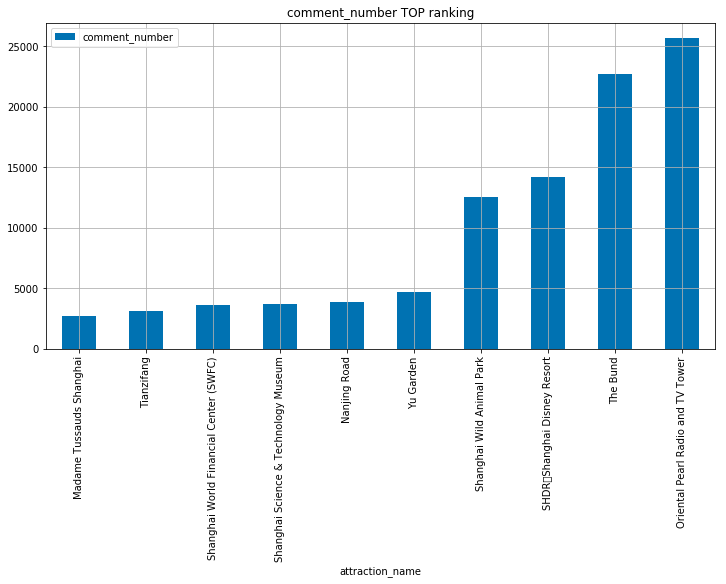

In [74]:
# Create a figure
createfig('comment_number')

In [75]:
# data normalization, let all the data are in 0-1 by (x-min)/(max-min)
def data_nor (df,col):
    df[col+'_nor'] = (df[col]-df[col].min())/(df[col].max()-df[col].min())

data_nor(df,'comment_number')
data_nor(df,'strategy_number')
data_nor(df,'total_star')

In [76]:
df.head()

,attraction_name,comment_number,lat,lng,ranking,strategy_number,total_star,comment_number_nor,strategy_number_nor,total_star_nor
0,SHDR：Shanghai Disney Resort,14238,31.146751,121.669396,1,151,96.0,0.554449,0.141518,0.96
1,The Bund,22701,31.243453,121.497204,2,1067,94.0,0.885009,1.000000,0.94
2,Shanghai City God Temple,1292,31.231574,121.499000,4,561,82.0,0.048785,0.525773,0.82
3,Tianzifang,3110,31.214113,121.474974,3,552,88.0,0.119795,0.517338,0.88
4,Oriental Pearl Radio and TV Tower,25645,31.245093,121.506379,1,534,90.0,1.000000,0.500469,0.90


In [78]:
# export the data to the Desktop
df.to_excel('/Users/qiuxianghu/Desktop/result.xlsx')